In [6]:
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from keras.models import load_model

In [3]:
import os

os.chdir("C:/Users/anilj.ANIL_JOSEPH\OneDrive/Desktop/face_detection_app")

In [4]:
import numpy as np

with np.load('models/Indian-celeb-embeddings.npz') as data:
    print(data.files)


['arr_0', 'arr_1']


In [5]:
import numpy as np

with np.load('models/Indian-celeb-embeddings.npz') as data:
    embeddings = data['arr_0']
    labels = data['arr_1']

print("Embeddings shape:", embeddings.shape)
print("Embeddings dtype:", embeddings.dtype)
print("Labels shape:", labels.shape)
print("Labels dtype:", labels.dtype)


Embeddings shape: (1538, 128)
Embeddings dtype: float32
Labels shape: (1538,)
Labels dtype: <U20


In [8]:
# Load MTCNN face detector
detector = MTCNN()

# Load Facenet model
facenet_model = load_model('models/facenet_model.h5')

# Load face embeddings and labels from npz file
with np.load('models/Indian-celeb-embeddings.npz') as data:
    embeddings = data['arr_0']
    labels = data['arr_1']


In [9]:
# Define function to extract face embeddings
def extract_face_embeddings(face):
    face = cv2.resize(face, (160, 160))
    face = face.astype('float32') / 255.0
    face = np.expand_dims(face, axis=0)
    embedding = facenet_model.predict(face)
    return embedding

# Define function to recognize faces
def recognize_faces(face_embeddings):
    distances = np.linalg.norm(face_embeddings - embeddings, axis=1)
    indices = np.argmin(distances)
    return labels[indices]

In [12]:
# Load image file
image_path = 'test/test_image.jpg'
image = cv2.imread(image_path)

1/1 [==============================] - 0s 44ms/step


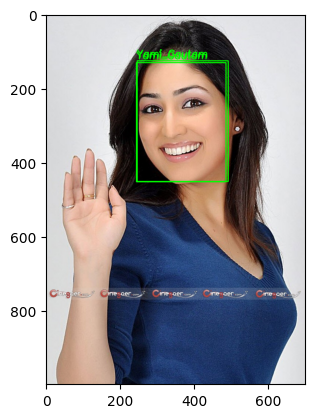

In [15]:
if image is None:
    print(f"Error: Unable to load image file '{image_path}'")
else:
    # Detect faces in the image
    faces = detector.detect_faces(image)

    # Extract face embeddings and recognize faces
    for face in faces:
        x, y, width, height = face['box']
        face_image = image[y:y+height, x:x+width]
        embedding = extract_face_embeddings(face_image)
        recognized_label = recognize_faces(embedding)
        cv2.rectangle(image, (x, y), (x+width, y+height), (0, 255, 0), 2)
        cv2.putText(image, recognized_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the output
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

## Full code

1/1 [==============================] - 1s 1s/step


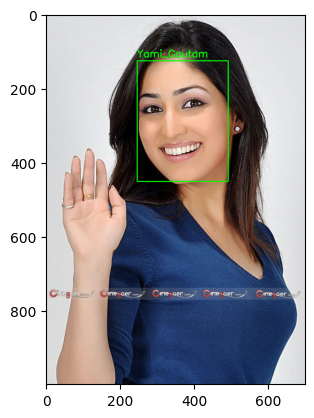

In [17]:
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
import matplotlib.pyplot as plt

# Load MTCNN face detector
detector = MTCNN()

# Load Facenet model
facenet_model = load_model('models/facenet_model.h5')

# Load face embeddings and labels from npz file
with np.load('models/Indian-celeb-embeddings.npz') as data:
    embeddings = data['arr_0']
    labels = data['arr_1']

# Define function to extract face embeddings
def extract_face_embeddings(face):
    face = cv2.resize(face, (160, 160))
    face = face.astype('float32') / 255.0
    face = np.expand_dims(face, axis=0)
    embedding = facenet_model.predict(face)
    return embedding

# Define function to recognize faces
def recognize_faces(face_embeddings):
    distances = np.linalg.norm(face_embeddings - embeddings, axis=1)
    indices = np.argmin(distances)
    return labels[indices]

# Load image file
image_path = 'test/test_image.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to load image file '{image_path}'")
else:
    # Detect faces in the image
    faces = detector.detect_faces(image)

    # Extract face embeddings and recognize faces
    for face in faces:
        x, y, width, height = face['box']
        face_image = image[y:y+height, x:x+width]
        embedding = extract_face_embeddings(face_image)
        recognized_label = recognize_faces(embedding)
        cv2.rectangle(image, (x, y), (x+width, y+height), (0, 255, 0), 2)
        cv2.putText(image, recognized_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the output
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()


1/1 [==============================] - 2s 2s/step


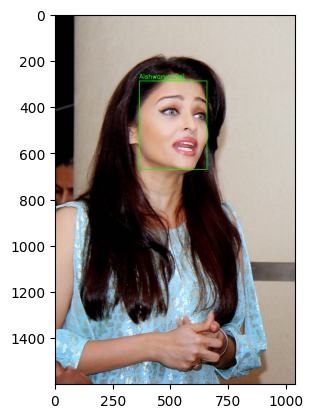

In [18]:
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from keras.models import load_model
import matplotlib.pyplot as plt

# Load MTCNN face detector
detector = MTCNN()

# Load Facenet model
facenet_model = load_model('models/facenet_model.h5')

# Load face embeddings and labels from npz file
with np.load('models/Indian-celeb-embeddings.npz') as data:
    embeddings = data['arr_0']
    labels = data['arr_1']

# Define function to extract face embeddings
def extract_face_embeddings(face):
    face = cv2.resize(face, (160, 160))
    face = face.astype('float32') / 255.0
    face = np.expand_dims(face, axis=0)
    embedding = facenet_model.predict(face)
    return embedding

# Define function to recognize faces
def recognize_faces(face_embeddings):
    distances = np.linalg.norm(face_embeddings - embeddings, axis=1)
    indices = np.argmin(distances)
    return labels[indices]

# Load image file
image_path = 'test/Aishwarya_Rai_1.jpg'
image = cv2.imread(image_path)

if image is None:
    print(f"Error: Unable to load image file '{image_path}'")
else:
    # Detect faces in the image
    faces = detector.detect_faces(image)

    # Extract face embeddings and recognize faces
    for face in faces:
        x, y, width, height = face['box']
        face_image = image[y:y+height, x:x+width]
        embedding = extract_face_embeddings(face_image)
        recognized_label = recognize_faces(embedding)
        cv2.rectangle(image, (x, y), (x+width, y+height), (0, 255, 0), 2)
        cv2.putText(image, recognized_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Display the output
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()
